Use calls data from fpp2 R package to look at the seasonality.

In [61]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [178]:
import pandas as pd
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
from scipy import fftpack

import seaborn as sns; 
sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style("white")

In [141]:
calls = pd.read_csv("calls.csv")

In [142]:
calls.head()

,event_dt,calls
0,X3.3.20031,111
1,X3.3.20032,113
2,X3.3.20033,76
3,X3.3.20034,82
4,X3.3.20035,91


In [143]:
calls["id"] = np.arange(len(calls))
calls["calls_log"] = np.log(calls["calls"])

In [144]:
calls.head()

,event_dt,calls,id,calls_log
0,X3.3.20031,111,0,4.709530
1,X3.3.20032,113,1,4.727388
2,X3.3.20033,76,2,4.330733
3,X3.3.20034,82,3,4.406719
4,X3.3.20035,91,4,4.510860


In [145]:
calls.dtypes

event_dt      object
calls          int64
id             int32
calls_log    float64
dtype: object

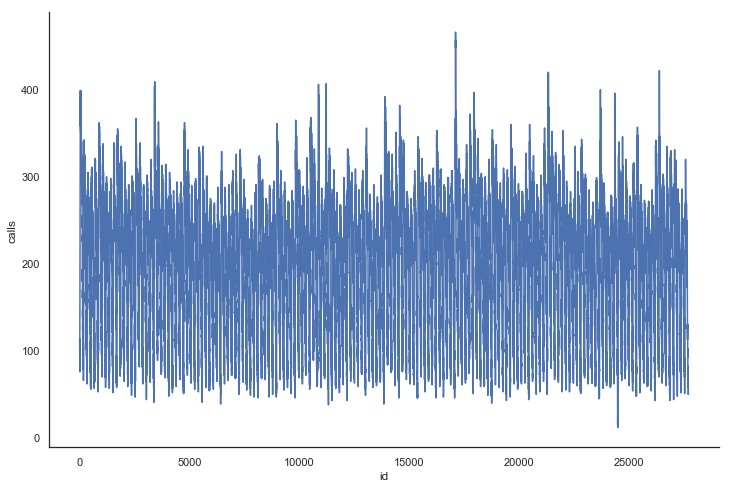

In [146]:
sns.lineplot(x = calls["id"], y = calls["calls"])
sns.despine()

In [173]:
n = len(calls["calls"])
logcalls = calls["calls_log"].values

data are for five-minute call volume handled on weekdays between 7:00am and 9:05pm, 
from 3 March 2003 to 23 May 2003. 

So to calculate sampling frequency we take  14 hours * 60 minutes  + 5 minutes. 

In [214]:
14 * 60 + 5

845

C:\Users\avishn955\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


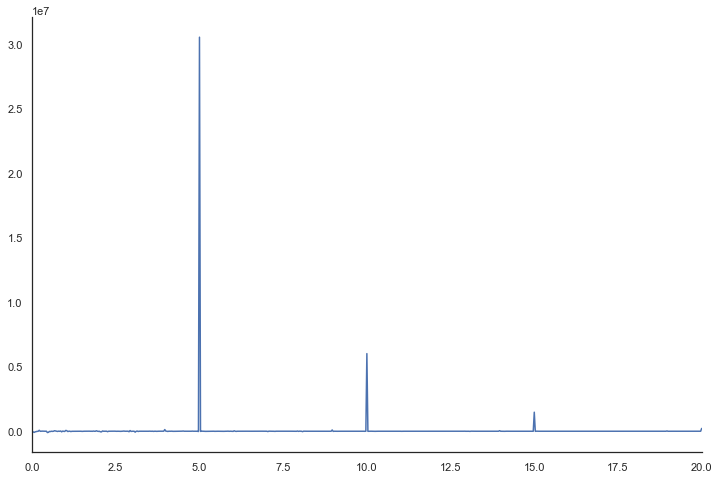

In [217]:
psd = rfft(logcalls) ** 2
freqs = rfftfreq(len(logcalls), d = 1./845.0)

sns.lineplot(x = freqs[1:], y = psd[1:])
plt.xlim(0, 20)
sns.despine()
